# **DIGIT HANDWRITING CLASSIFICATION**

## Abstract
The problem of handwritten digit recognition has long been an open problem in the field of pattern classification. A ton of studies have shown that Neural networks, machine learning have great and efficient performance. In data classification Deep learning and Neural Network algorithms are a branch of Machine learning that can automatically identify patterns in the data, and then use the uncovered patterns to predict future data, or to perform other alternative kinds of decision making under unreliability Deep Learning algorithms are used to model high level abstractions in data.

## Problem Statement
In this notebook our aim will be to build simple feedforward neural network using softmax to predict the number in each
image.

## Importing dependencies

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import glob
import tqdm as tqdm
import tensorflow as tf
from tensorflow import keras

Now we have to use the image, and convert int to vector array to create a dataframe that we can use for model development.

#### Defining function that will be used in for converting the image into array

In [2]:
# code to read and convert images into vector array
def convert_image(img_file):
    img = Image.open(img_file).convert('L').resize((28,28))
    img_data = np.asarray(img).reshape(1,-1)
    return img_data

## Reading the Images files and Creating a tabular dataset with converted image arrays

In [3]:
df = pd.DataFrame()
for i in tqdm.tqdm_notebook(range(10)):
    imglist = glob.glob(f'assets/data/{i}/*')
    for file in imglist:
        temp = pd.DataFrame(convert_image(file))
        temp['target'] = i
        df = df.append(temp, ignore_index=True)

<ipython-input-3-907b4f727f23>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm.tqdm_notebook(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

#### Initializing two variable which will carry the Dependent and Target Variable

In [4]:
# creating feature and target set
Xdata = df.iloc[:,:-1]
Ydata = df.iloc[:,-1]

#### Splitting data for training and testing the model

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# splitting the feature and target for training and testing the model
x_train, x_test, y_train, y_test = train_test_split(Xdata,Ydata,test_size = 0.2, random_state = 1)

## Modelling

##### We are now going to define the model, by addming layers and activation parameters, We will also add the compiling parameter the will calculate and display te performance of the model.

In [7]:
# building a feed forward neural network  model
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(784,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.optimizers.Adam(), loss="sparse_categorical_crossentropy", metrics=['Accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


##### So we are model is defined and its good to fit the data

In [8]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1050/1050 [==============================] - 2s 1ms/step - loss: 4.0480 - Accuracy: 0.8596
Epoch 2/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.5193 - Accuracy: 0.8998
Epoch 3/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.3484 - Accuracy: 0.9206
Epoch 4/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2935 - Accuracy: 0.9284
Epoch 5/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2601 - Accuracy: 0.9331
Epoch 6/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2389 - Accuracy: 0.9416
Epoch 7/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2232 - Accuracy: 0.9436
Epoch 8/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.2201 - Accuracy: 0.9446
Epoch 9/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1860 - Accuracy: 0.9524
Epoch 10/10
1050/1050 [==============================] - 1s 1ms/step - loss: 0.191

#### Model Evaluation

In [9]:
model.evaluate(x_test, y_test)

263/263 [==============================] - 0s 879us/step - loss: 0.3292 - Accuracy: 0.9387


[0.3292447030544281, 0.9386904835700989]

#### Lets predict the digit with trained data first

#### Predicting 1 :

In [10]:
# using an image from training set
np.argmax(model.predict(np.asarray(x_train.head(1))))

4

Lets take look at the converted array what was the actual image looking like...

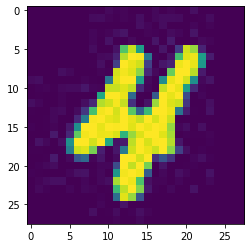

In [11]:
import matplotlib.pyplot as plt
plt.imshow(np.asarray(x_train.head(1)).reshape(28,-1))

#### Predicting 2:

In [12]:
# predicting result for image downloaded from google
np.argmax(model.predict((convert_image('MNIST_6_0.png'))))

5

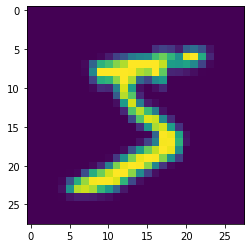

In [13]:
import matplotlib.pyplot as plt
plt.imshow(convert_image('MNIST_6_0.png').reshape(28,-1))

### Saving data to csv file

In [14]:
df.to_csv('output/processed_dataset/mnist_digit_data.csv', index=False)

## Conclusion:

The notebook has practised machine learning techniques including use of Tensorflow to obtain the appropriate digit recognition.


_Time taken in execution of this notebook : 329.8285059928894 sec_

<div style="margin-top:100px; float:right; text-align:right;">
        <h3>Author</h3>
        <h4>Akash Sharma</h4>
        <a href="https://www.linkedin.com/in/akash-sharma-01775b14a">
            <img src="https://img.shields.io/static/v1?logo=linkedin&labelColor=orange&logoColor=white&label=&message=LinkedIn&color=informational&style=plastic" alt="LinkedIn">
        </a>
        <a href="https://discord.com/users/366283102462541865">
            <img src="https://img.shields.io/static/v1?logo=discord&labelColor=grey&logoColor=white&label=&message=Discord&color=blue&style=plastic" alt="Discord">
        </a>
        <a href="https://github.com/CosmiX-6">
            <img src="https://img.shields.io/static/v1?logo=github&labelColor=green&logoColor=black&label=&message=GitHub&color=black&style=plastic" alt="GitHub">
        </a>
</div>